In [1]:
import pandas as pd
from prophet import Prophet

In [2]:
data = pd.read_csv('가자미.csv')
data['ds'] = pd.to_datetime(data['기간'])  # 'ds' 컬럼을 날짜 형식으로 변환
data.rename(columns={'단가': 'y'}, inplace=True)  # 종속 변수 컬럼 이름을 'y'로 변경

In [3]:
model1 = Prophet(seasonality_prior_scale=1)
model1.fit(data)

23:00:17 - cmdstanpy - INFO - Chain [1] start processing
23:00:18 - cmdstanpy - INFO - Chain [1] done processing


In [4]:
future = model1.make_future_dataframe(periods=12, freq='M')  # 향후 12개월의 날짜 생성
forecast = model1.predict(future)

In [5]:
forecast['yhat'] = forecast['yhat'].apply(lambda x: max(0, x))

In [6]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
25,2023-02-28,10771.295798,10715.786150,10826.077299
26,2023-03-31,8830.457764,8762.770964,8900.753070
27,2023-04-30,7824.042838,7720.725704,7925.004115
28,2023-05-31,3225.729865,3076.037423,3389.606244
29,2023-06-30,8318.992967,8110.769379,8525.892730
30,2023-07-31,11063.673122,10794.903221,11341.986522
31,2023-08-31,11132.327083,10804.137450,11491.456940
32,2023-09-30,8164.096561,7733.233597,8589.903066
33,2023-10-31,13544.746100,13020.066603,14060.599920
34,2023-11-30,8905.825097,8297.748998,9497.109862


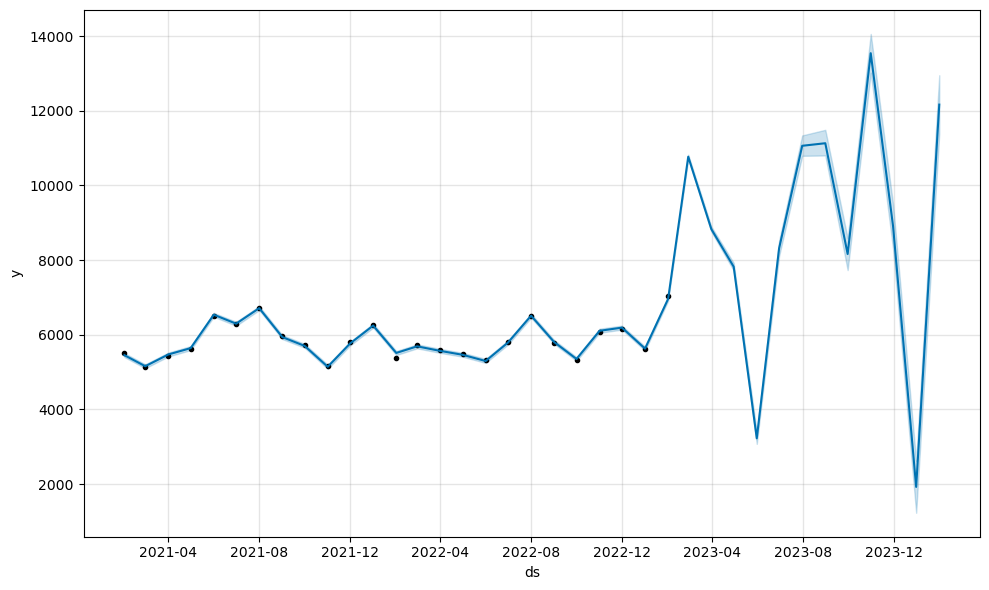

In [7]:
fig1 = model1.plot(forecast)

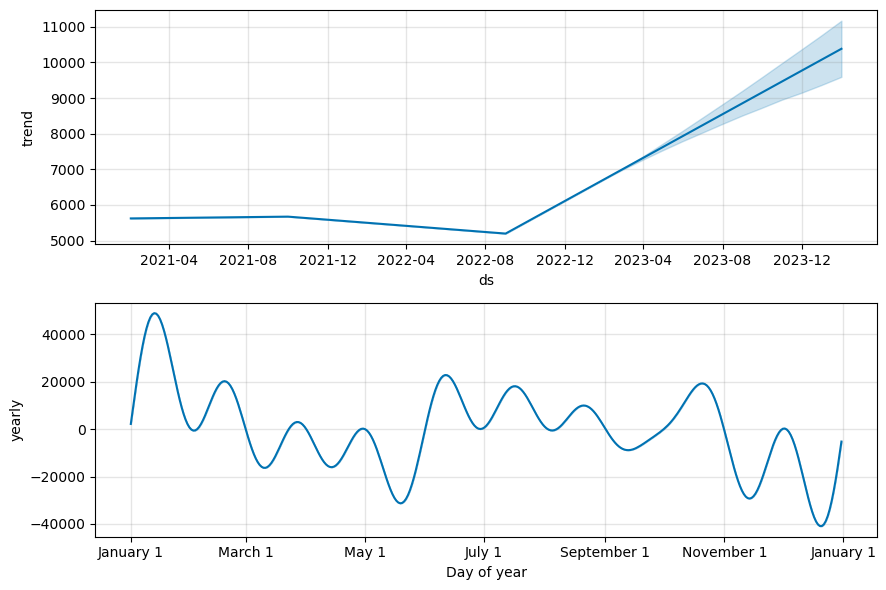

In [8]:
fig2 = model1.plot_components(forecast)

In [30]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [31]:
data = pd.read_csv('가자미.csv')

In [32]:
quantity = data['물량-평균'].values
price = data['단가'].values

In [33]:
model = LinearRegression()
model.fit(quantity.reshape(-1, 1), price)

LinearRegression()

In [34]:
print("물량과 가격 분석 결과:")
print("기울기 (회귀 계수):", model.coef_[0])
print("절편 (절편 값):", model.intercept_)

물량과 가격 분석 결과:
기울기 (회귀 계수): -0.15487450837237762
절편 (절편 값): 6206.2645056145375


In [35]:
future_quantity = 50 # 예측할 물량
predicted_price = model.predict([[future_quantity]])

In [36]:
print("물량에 따른 예측 가격:")
print("물량:", future_quantity)
print("예측 가격:", predicted_price[0])

물량에 따른 예측 가격:
물량: 50
예측 가격: 6198.520780195919
